# K-nearest neighbors

In [19]:
import numpy as np
from sklearn import datasets
from pandas import Series, DataFrame

In [20]:
iris = datasets.load_iris()

In [21]:
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

In [22]:
df = DataFrame(iris.data, columns = names[:4])
df[names[4]] = Series(iris.target)

In [23]:
from matplotlib import pyplot as plt

In [24]:
#plt.style.use('ggplot')

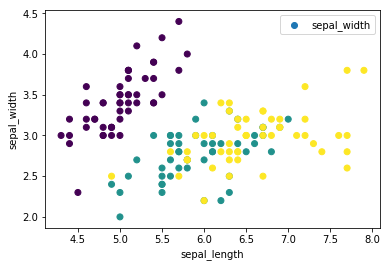

In [25]:
%matplotlib inline
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c = df['class'])
plt.xlabel(names[0])
plt.ylabel(names[1])
plt.legend()

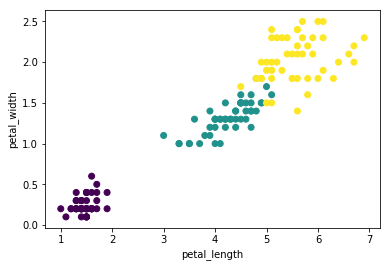

In [26]:
plt.scatter(df.iloc[:, 2], df.iloc[:, 3], c = df['class'])
plt.xlabel(names[2])
plt.ylabel(names[3])

In this case, no need to normalize features; but in other cases, we should do that.

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import KFold

In [28]:
numFolds = 6
k_fold = KFold(n=len(df), n_folds=numFolds)
scores = []
#n_neighbors = len(df) - len(df) // numFolds
n_neighbors = 1
clf = KNeighborsClassifier(n_neighbors, weights='distance') #weights = 'uniform'

for train_indices, test_indices in k_fold:
    X_train = df.iloc[train_indices, :4].values
    y_train = df.iloc[train_indices, 4].values

    X_test = df.iloc[test_indices, :4].values
    y_test = df.iloc[test_indices, 4].values

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred)*100)
print('Model Score with %d neigbors: %f' %(n_neighbors,sum(scores)/len(scores)))
    

Model Score with 1 neigbors: 94.666667


## Use user defined metric

In [29]:
def mydist(x, y):
    return np.sum((x-y)**2)

clf = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree', metric=mydist)
clf.fit(df.iloc[2:,:4], df.iloc[2:,4])
print(df.tail())
clf.predict(df.iloc[120:124,:4])

     sepal_length  sepal_width  petal_length  petal_width  class
145           6.7          3.0           5.2          2.3      2
146           6.3          2.5           5.0          1.9      2
147           6.5          3.0           5.2          2.0      2
148           6.2          3.4           5.4          2.3      2
149           5.9          3.0           5.1          1.8      2


array([2, 2, 2, 2])

# Clustering

In [30]:
from sklearn.cluster import KMeans


In [31]:
kmeans_model = KMeans(n_clusters=3, random_state=1, max_iter = 300).fit(df.iloc[:,:4])

In [32]:
print(kmeans_model.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


==> Compute errors based on labels

In [33]:
results = Series(kmeans_model.labels_).map({1:0, 0: 1, 2:2})

In [34]:
error = (sum(results != df.iloc[:,4]) / len(df)) * 100
error

0

Given the knowledge of the ground truth class assignments labels_true and our clustering algorithm assignments of the same samples labels_pred, the adjusted Rand index is a function that measures the similarity of the two assignments, ignoring permutations and with chance normalization.

Perfect labeling is scored 1.0.

Bad (e.g. independent labelings) have negative or close to 0.0 scores.

In [35]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

In [36]:
adjusted_rand_score(df['class'], kmeans_model.labels_)  

0.73023827228346971

In [37]:
adjusted_mutual_info_score(df['class'], kmeans_model.labels_)  

0.74837239332294847

If the ground truth labels are not known, evaluation must be performed using the model itself. 
The Silhouette Coefficient (sklearn.metrics.silhouette_score) is an example of such an evaluation, where a higher Silhouette Coefficient score relates to a model with better defined clusters. 

The Silhouette Coefficient is defined for each sample and is composed of two scores:
a: The mean distance between a sample and all other points in the same class.
b: The mean distance between a sample and all other points in the next nearest cluster.

The Silhouette Coefficient s for a single sample is then given as:
$s = \frac{b - a}{max(a, b)}$
The Silhouette Coefficient for a set of samples is given as the mean of the Silhouette Coefficient for each sample.

In [38]:
silhouette_score(df.iloc[:,:4], kmeans_model.labels_, metric='euclidean')

0.55259194453090321

#### Activity: 
1. Repeat k-means clustering several times and obtain the best clustering
2. Find the best number of clusters.